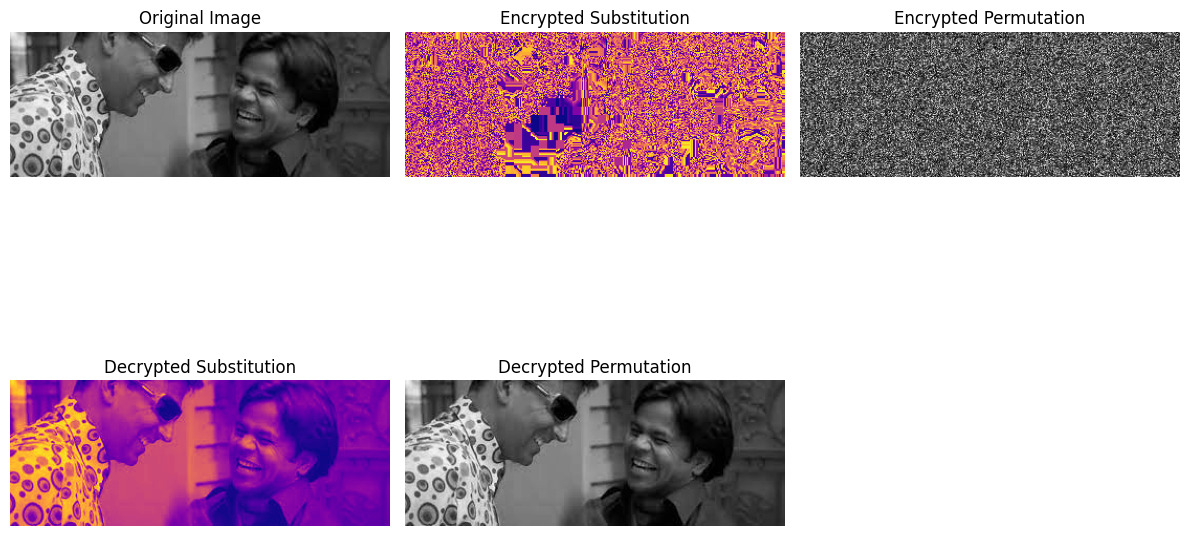

In [11]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def substitution_encrypt(image):
    height, width = image.shape[:2]
    encrypted_image = np.zeros((height, width), dtype=np.uint8)
    lut = list(range(256))
    random.shuffle(lut)
    for i in range(height):
        for j in range(width):
            encrypted_image[i, j] = lut[image[i, j]]
    return encrypted_image, lut

def substitution_decrypt(encrypted_image, lut):
    height, width = encrypted_image.shape[:2]
    decrypted_image = np.zeros((height, width), dtype=np.uint8)
    lut_inverse = [0] * 256
    for i, val in enumerate(lut):
        lut_inverse[val] = i
    for i in range(height):
        for j in range(width):
            decrypted_image[i, j] = lut_inverse[encrypted_image[i, j]]
    return decrypted_image

def permutation_encrypt(image):
    height, width = image.shape[:2]
    indices = list(range(height * width))
    random.shuffle(indices)
    encrypted_image = np.zeros((height, width), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            idx = indices[i * width + j]
            encrypted_image[i, j] = image[idx // width, idx % width]
    return encrypted_image, indices

def permutation_decrypt(encrypted_image, indices):
    height, width = encrypted_image.shape[:2]
    decrypted_image = np.zeros((height, width), dtype=np.uint8)
    for i, idx in enumerate(indices):
        decrypted_image[idx // width, idx % width] = encrypted_image[i // width, i % width]
    return decrypted_image

# Load an image
image_path = 'image.png'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Encrypt the image
encrypted_substitution, lut = substitution_encrypt(original_image)
encrypted_permutation, indices = permutation_encrypt(original_image)

# Decrypt the images
decrypted_substitution = substitution_decrypt(encrypted_substitution, lut)
decrypted_permutation = permutation_decrypt(encrypted_permutation, indices)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(232)
plt.imshow(encrypted_substitution, cmap='plasma')
plt.title('Encrypted Substitution')
plt.axis('off')

plt.subplot(233)
plt.imshow(encrypted_permutation, cmap='gray')
plt.title('Encrypted Permutation')
plt.axis('off')

plt.subplot(234)
plt.imshow(decrypted_substitution, cmap='plasma')
plt.title('Decrypted Substitution')
plt.axis('off')

plt.subplot(235)
plt.imshow(decrypted_permutation, cmap='gray')
plt.title('Decrypted Permutation')
plt.axis('off')

plt.tight_layout()
plt.show()
